# Assignment 2: Linear Regression

Adapted from https://github.com/dibgerge/ml-coursera-python-assignments. You shouldn't need to install anything different than you did for Assignment 1, but you can find instructions on how to install required libraries in the README file in the [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline
plt.style.use('ggplot')

## Debugging and Other Tips

Here are some things to keep in mind throughout this exercise:

- There is an important distinction between python arrays (called `list` or `tuple`) and `numpy` arrays. You should use `numpy` arrays in all your computations. Vector/matrix operations work only with `numpy` arrays. Python lists do not support vector operations (you need to use for loops).

- If you are seeing many errors at runtime, inspect your matrix operations to make sure that you are adding and multiplying matrices of compatible dimensions. Printing the dimensions of `numpy` arrays using the `shape` property will help you debug.

- By default, `numpy` interprets math operators to be element-wise operators. If you want to do matrix multiplication, you need to use the `dot` function in `numpy` or the @ symbol. For, example if `A` and `B` are two `numpy` matrices, then the matrix operation AB is `np.dot(A, B)`. Note that for 2-dimensional matrices or vectors (1-dimensional), this is also equivalent to `A@B` (requires python >= 3.5).

- To quickly learn more about the `matplotlib` plot function and what arguments you can provide to it, you can type `?plt.plot` in a cell within the Jupyter notebook. This opens a separate page showing the documentation for the requested function. You can also search online for plotting documentation. 

## Dataset

We will be using a modified version of the Boston Housing price dataset (https://www.kaggle.com/c/boston-housing) for this assignment.  It contains 13 input features and one target value.

*  CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per ```$```10,000
* PTRATIO - pupil-teacher ratio by town
* target - Median value of owner-occupied homes in ```$```1000's




In [10]:
from sklearn.datasets import load_boston
import pandas as pd
from pandas.plotting import scatter_matrix

# load the data
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df = df.drop(labels=['CHAS','B', 'LSTAT'],axis=1)

m = df.shape[0]

# summarize contents of dataset
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.596783,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.647423,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


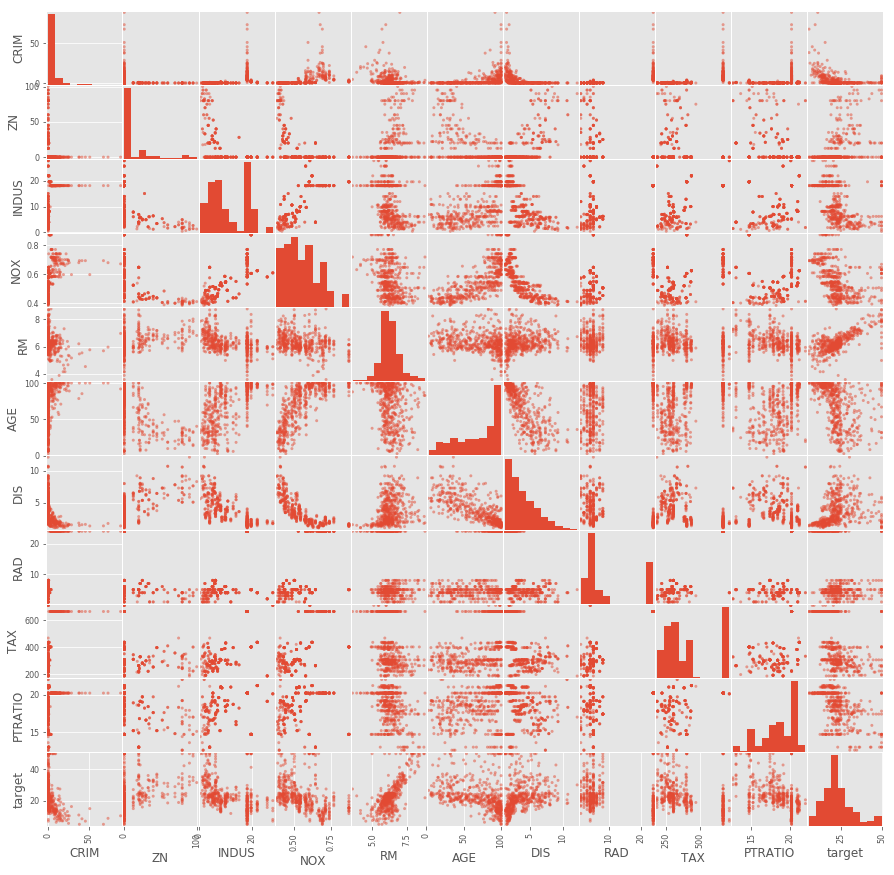

In [11]:
# visualize contents of dataset
scatter_matrix(df, figsize=(15,15));

## Linear regression with one variable

Now you will implement linear regression with one variable to predict the home price.  The dataset is loaded from the dataframe into the variables `x` and `y`:

In [12]:
X = df.RM.values.reshape(-1,1)
y = df.target.values.reshape(-1,1)

### Plotting the Data

In the following part, your first job is to complete the `plotData` function below. Modify the function and fill in the following code:

```python
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Home Price ($1,000)')
    plt.xlabel('Number of Rooms')
```

In [13]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = plt.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    plt.plot(x, y, 'ro', ms=5, mec='k')
    plt.ylabel('Home Price ($1,000)')
    plt.xlabel('Number of Rooms')

    # =============================================================

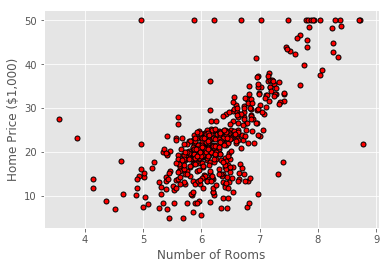

In [14]:
plotData(X, y)

### The Easy Way

We will fit a linear regression model using the built-in scikit learn function.

Optimal Model Parameters: [-34.67062078   9.10210898]


Text(0,0.5,'Predicted Value')

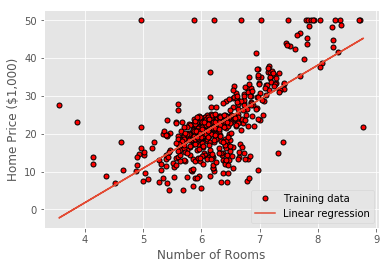

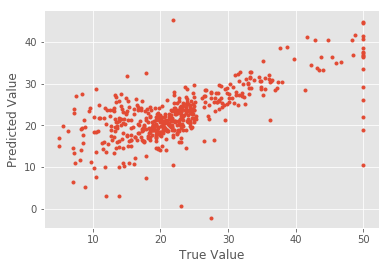

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# plot the linear fit
plotData(X, y)
plt.plot(X, regr.predict(X),'-')
plt.legend(['Training data', 'Linear regression']);

theta_opt = np.array([regr.intercept_[0],regr.coef_[0]])
print("Optimal Model Parameters: {}".format(theta_opt))

plt.figure()
plt.plot(y, regr.predict(X), '.')
plt.xlabel('True Value');
plt.ylabel('Predicted Value')

### Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

*Implementation Note:* We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.

#### Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term.

In [218]:
X = df.RM.values.reshape(-1,1)
y = df.target.values.reshape(-1,1)
X_aug_single = np.column_stack([np.ones((m,1)), X])


#### Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.

*Implementation Hint* You should be able to implement this in a single line using ```np.mean``` and the ```@``` symbol for matrix multiplication.

In [180]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    J = (1/2) * np.mean( np.square(X@theta - y) )
    # ===========================================================
    
    return J

Once you have completed the function, the next step will run `computeCost` and see if you get the right answer.

Cost computed = 66.89
Expected cost value (approximately) 66.89



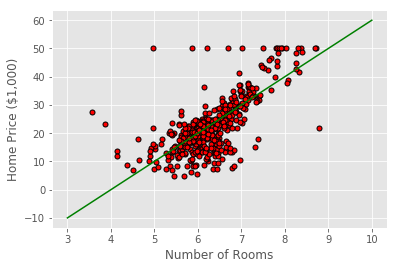

In [181]:
theta1 = np.array([-40.0, 10.0])
J = computeCost(X_aug_single, y, theta=theta1)

print('Cost computed = %.2f' % J)
print('Expected cost value (approximately) 66.89\n')

# show the raw data
plotData(X_aug_single[:,1], y)

# show the line
X_domain = np.stack([np.ones(2), np.linspace(3,10,2)], axis=1)
plt.plot(X_domain[:,1], X_domain@theta1.T,color='g');


#### Gradient descent

Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

---

#### WARNING Vectors and matrices in `numpy`

A vector in `numpy` is a one dimensional array, for example `np.array([1, 2, 3])` is a vector. A matrix in `numpy` is a two dimensional array, for example `np.array([[1, 2, 3], [4, 5, 6]])`. However, the following is still considered a matrix `np.array([[1, 2, 3]])` since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function `np.dot` which we will use for all matrix/vector multiplication has the following properties:
- It always performs inner products on vectors. If `x=np.array([1, 2, 3])`, then `np.dot(x, x)` is a scalar.
- For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation `np.dot(y, X)` considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation `np.dot(X, y)` considers $y$ as a $n \times 1$ vector.
- A vector can be promoted to a matrix using `y[None]` or `[y[np.newaxis]`. That is, if `y = np.array([1, 2, 3])` is a vector of size 3, then `y[None, :]` is a matrix of shape $1 \times 3$. We can use `y[:, None]` to obtain a shape of $3 \times 1$.

In [258]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    # scale the room number so that it converges more quickly
    X = X.copy()
    X[:,-1] /= 8.
    
    print("xtran", X.transpose().shape)
    print("\nx", X.shape)
    print("\ny", y.shape)
    
    for i in range(num_iters):

      # ==================== YOUR CODE HERE =================================

      # =====================================================================

      # save the cost J in every iteration
        #theta = theta - alpha*X.transpose()*np.mean(X@theta-y)
        theta = theta - (alpha/m)*X.transpose()@(X@theta - y)
        J_history.append(computeCost(X, y, theta))
    
    # scale up the theta value that corresponds to the room number so it works
    # on unscaled data
    theta[:,-1] /= 8.
    
    return theta, J_history

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. Execute the following cell to check your code.

xtran (2, 506)

x (506, 2)

y (506, 1)
Theta found by gradient descent: [[-4.32902239]
 [ 9.09602128]] (should be close to [-34.6 9.1])
Final Cost: 21.800285031926546 (should be less than 22)
(1, 2)


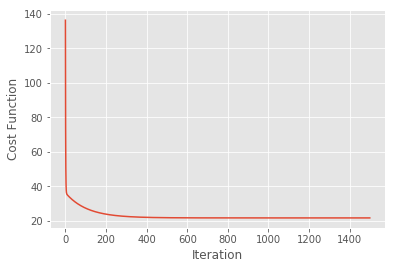

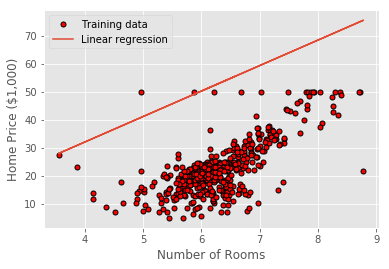

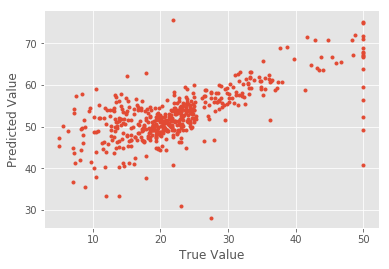

In [263]:
# initialize fitting parameters
theta_init = np.zeros((1,2))
#changing theta_init shape
theta_init = theta_init.reshape((2,1))

# some gradient descent setting
# (these settings should work well if you exactly
# implement the cost function and gradients described above)

iterations = 1500
alpha = 1.0
theta_single, J_history = gradientDescent(X_aug_single, y, theta_init, alpha, iterations)

print('Theta found by gradient descent: {} (should be close to [-34.6 9.1])'.format(theta_single))
print('Final Cost: {} (should be less than 22)'.format(J_history[-1]))

plt.figure()
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')

#change theta single
theta_single = theta_single.reshape((1,2))

# plot the linear fit
plotData(X, y)
plt.plot(X, X_aug_single@theta_single.T, '-')
plt.legend(['Training data', 'Linear regression']);

plt.figure()
plt.plot(y, X_aug_single@theta_single.T, '.')
plt.xlabel('True Value');
plt.ylabel('Predicted Value');

Your final model should look very similar to the optimal one found using the scikit learn function above.

### Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next cell, the code is set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote. After executing the following cell, you will have a 2-D array of $J(\theta)$ values. Then, those values are used to produce surface and contour plots of $J(\theta)$ using the matplotlib `plot_surface` and `contourf` functions. The plots should look something like the following:

![](Figures/cost_function.png)

The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

In [ ]:
# grid over which we will calculate J
theta0_vals = np.linspace(-120, 50, 100)
theta1_vals = np.linspace(-10, 20, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X_aug_single, y, np.array([theta0, theta1]).reshape(1,-1))
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta_single.flat[0], theta_single.flat[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum');

## Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

### Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [ ]:
def featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================

    # ================================================================
    
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [ ]:
X = df.values[:,:-1]
y = df.values[:,(-1,)]

# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [ ]:
# Add intercept term to X
X_aug_multi = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

### Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [ ]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    # ==================================================================
    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):

        # ======================= YOUR CODE HERE ==========================

        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [ ]:
theta_init = np.zeros((1,11))

iterations = 1500
alpha = .01
theta_multi, J_history = gradientDescentMulti(X_aug_multi, y, theta_init, alpha, iterations)

print('Theta found by gradient descent: {}'.format(theta_multi))
print('Final Cost: {} (should be less than about 15.5)'.format(J_history[-1]))

plt.figure()
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')

# plot the linear fit
plt.figure()
plt.plot(y, X_aug_multi@theta_multi.T, '.')
plt.xlabel('True Value');
plt.ylabel('Predicted Value');

### Normal Equations

In the lecture, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [ ]:
X = df.values[:,:-1]
y = df.values[:,(-1,)]
X_aug_normal = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete the code for the function `normalEqn` below to use the formula above to calculate $\theta$. 

<a id="normalEqn"></a>

In [ ]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    
    # =================================================================
    return theta

In [ ]:
# Calculate the parameters from the normal equation
theta_normal = normalEqn(X_aug_normal, y);

print('Theta found by gradient descent: {}'.format(theta_normal))
print('Final Cost: {} (should be close to 14.31)'.format(computeCostMulti(X_aug_normal,y,theta_normal)))

# plot the linear fit
plt.figure()
plt.plot(y, X_aug_normal@theta_normal.T, '.')
plt.xlabel('True Value');
plt.ylabel('Predicted Value');

In [ ]:
print("Final Cost (grad, single): {}".format(computeCost(X_aug_single,y,theta_single)))
print("Final Cost (grad, multi): {}".format(computeCostMulti(X_aug_multi,y,theta_multi)))
print("Final Cost (normal): {}".format(computeCostMulti(X_aug_normal,y,theta_normal)))